In [1]:
import pandas as pd

df_model = pd.read_csv('../data/data_to_cluster.csv')
df_model.head()

,'u,abl,access,acent,action,actualizacion,adttnf,advantag,age,ago,...,you'll,yrqv,yypohh,yzvmgmjbk,z,zae,zl,zr,zwfzskn,zxmgysbojb
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.241345,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.257764,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.390923,0.000000,0.0,0.0,0.0,0.0,0.0


In [2]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df_model)

def show_clusters_size(clusters):
    unique, counts = np.unique(clusters, return_counts=True)
    print(dict(zip(unique, counts)))

def show_pca(clusters):
    df_pca = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2', 'PC3'])
    fig, ax = plt.subplots(2, 2, figsize=(15,14))
    sns.scatterplot(data=df_pca, x='PC1', y='PC2', palette='Set1', hue=clusters, ax=ax[0][0])
    sns.scatterplot(data=df_pca, x='PC1', y='PC3', palette='Set1', hue=clusters, ax=ax[0][1])
    sns.scatterplot(data=df_pca, x='PC2', y='PC3', palette='Set1', hue=clusters, ax=ax[1][0])
    fig.delaxes(ax[1][1])

# DBSCAN

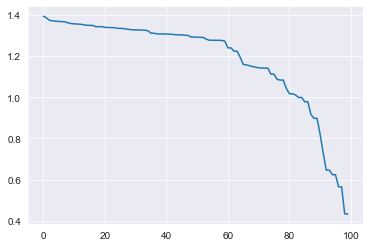

In [3]:
# k-dist function with MinPts = 2 * dimensions
from matplotlib import pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=12)
neighbors_fit = neighbors.fit(df_model)
distances, indices = neighbors_fit.kneighbors(df_model)
distances = np.sort(distances, axis=0)[::-1]
distances = distances[:,1]
plt.plot(distances)

In [4]:
# Parameters chosen using k-dist heuristic
eps = 0.6
minPts = 12

In [5]:
import time
from sklearn.cluster import DBSCAN

t0 = time.time()
dbscan = DBSCAN(eps=eps, min_samples=minPts).fit(df_model)
t_dbscan = time.time() - t0
print("DBSCAN required", t_dbscan, "seconds")
predictions = dbscan.fit_predict(df_model)
Clusters = predictions

DBSCAN required 0.01674818992614746 seconds


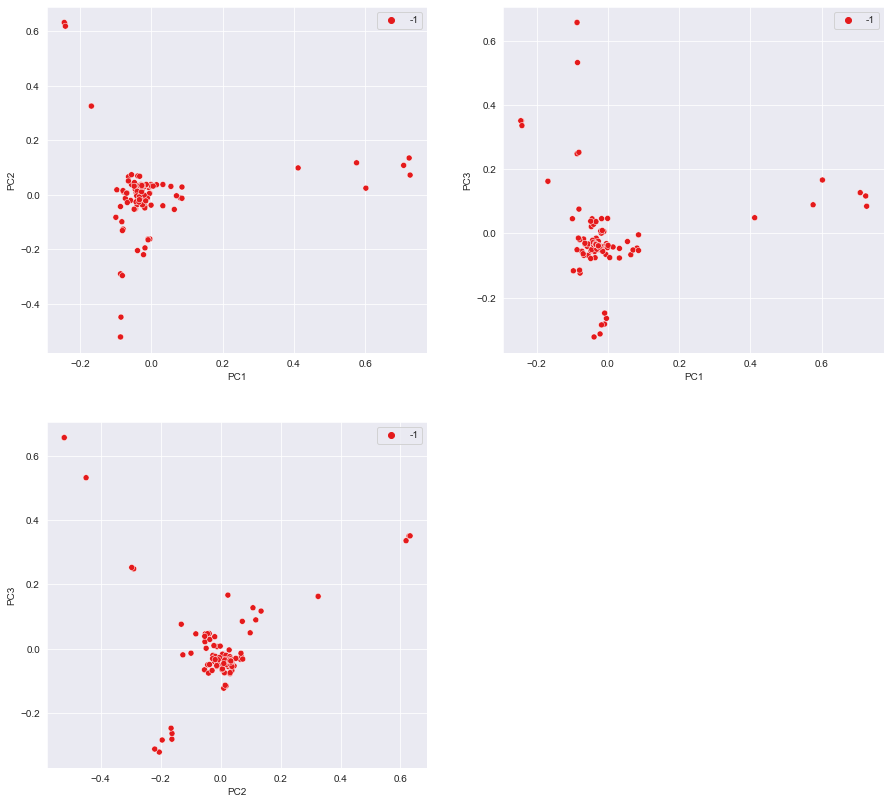

In [6]:
show_pca(Clusters)

In [7]:
show_clusters_size(Clusters)

{-1: 100}


In [11]:
# Testing different parameters
# Test 1
eps = 0.5
minPts = 15
dbscan = DBSCAN(eps=eps, min_samples=minPts).fit(df_model)
predictions = dbscan.fit_predict(df_model)
Clusters = predictions
show_clusters_size(Clusters)

{-1: 12781, 0: 34016, 1: 27, 2: 10, 3: 15, 4: 11, 5: 15}


In [12]:
#Test 2
eps = 0.4
minPts = 16
dbscan = DBSCAN(eps=eps, min_samples=minPts).fit(df_model)
predictions = dbscan.fit_predict(df_model)
Clusters = predictions
show_clusters_size(Clusters)

{-1: 33051, 0: 13619, 1: 26, 2: 13, 3: 10, 4: 10, 5: 20, 6: 16, 7: 9, 8: 13, 9: 17, 10: 16, 11: 23, 12: 8, 13: 11, 14: 13}


# OPTICS

OPTICS required 167.34119701385498 seconds


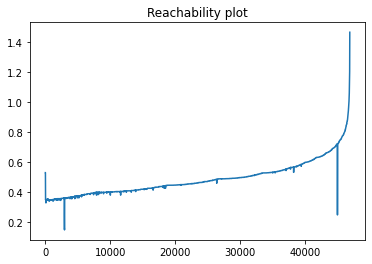

In [20]:
# OPTICS reachability distance plot
from sklearn.cluster import OPTICS

num_samples_total = 1000
epsilon = 2.0
min_samples = 22
cluster_method = 'xi'
metric = 'minkowski'
t0 = time.time()
db = OPTICS(max_eps=epsilon, min_samples=min_samples, cluster_method=cluster_method, metric=metric).fit(df_model)
t_optics = time.time() - t0
print("OPTICS required", t_optics, "seconds")
labels = db.labels_
reachability = db.reachability_[db.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.show()